#### Preprocess the SHP dataset.

#### Import necessary libraries.

In [1]:

import warnings
import dask.dataframe as dd
import numpy as np
import pandas as pd
import seaborn as sns


#### Load the dataset.

In [2]:

df = None

column_names = ["idx", "ecg_id", "lead1", "lead2", "lead3", "aVR", "aVL", "aVF",
                "V1", "V2", "V3", "V4", "V5", "V6", "arrhythmia_code"]
dtypes = {"ecg_id": "str", "lead1" : "float64", "lead2" : "float64", "lead3" : "float64", "aVR" : "float64", "aVL" : "float64",
          "aVF" : "float64", "V1" : "float64", "V2" : "float64", "V3" : "float64", "V4" : "float64",
          "V5" : "float64", "V6" : "float64", "arrhythmia_code" : "int16"}

try:
    print("\nStart loading CSV file...")
    df = dd.read_csv("../dataset/csv_files/ecg_sph_dataset.csv", sep="|", dtype = dtypes)
    df = df.drop(columns = ["idx"])
    print("\nFinish loading CSV file...")
except Exception as e:
    print("\nFail to load CSV file.")
    print("Error: {}".format(e))



Start loading CSV file...

Finish loading CSV file...


#### Display dataset size.

In [3]:

df.compute().shape


(128850000, 14)

#### Display dataset data types.

In [4]:

df.dtypes


ecg_id              object
lead1              float64
lead2              float64
lead3              float64
aVR                float64
aVL                float64
aVF                float64
V1                 float64
V2                 float64
V3                 float64
V4                 float64
V5                 float64
V6                 float64
arrhythmia_code      int16
dtype: object

#### Display the first rows of the dataset.

In [5]:

pd.set_option("display.precision", 16)
df.head()


,ecg_id,lead1,lead2,lead3,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,arrhythmia_code
0,A00001,0.0216064453125000,0.1303710937500,0.10882568359375,-0.07598876953125,-0.043212890625000,0.11999511718750,-0.0111999511718750,-0.0064010620117187,-0.0351867675781250,-0.054412841796875,-0.037597656250000,-0.062408447265625,22
1,A00001,0.0216064453125000,0.1319580078125,0.10961914062500,-0.07678222656250,-0.044006347656250,0.12078857421875,-0.0120010375976562,-0.0103988647460937,-0.0335998535156250,-0.054412841796875,-0.036804199218750,-0.062408447265625,22
2,A00001,0.0207977294921875,0.1319580078125,0.11120605468750,-0.07678222656250,-0.044799804687500,0.12158203125000,-0.0111999511718750,-0.0136032104492187,-0.0312042236328125,-0.052795410156250,-0.036804199218750,-0.062408447265625,22
3,A00001,0.0184020996093750,0.1328125000000,0.11358642578125,-0.07598876953125,-0.047210693359375,0.12322998046875,-0.0103988647460937,-0.0151977539062500,-0.0272064208984375,-0.051208496093750,-0.036804199218750,-0.063171386718750,22
4,A00001,0.0160064697265625,0.1335449218750,0.11682128906250,-0.07440185546875,-0.050415039062500,0.12561035156250,-0.0080032348632812,-0.0167999267578125,-0.0223999023437500,-0.048797607421875,-0.035186767578125,-0.064025878906250,22


#### Display dataset statistics.

In [6]:

df = df.drop(columns = ["ecg_id"])
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().compute()


,lead1,lead2,lead3,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,arrhythmia_code
count,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000,128850000.000
mean,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.002,-0.001,-0.002,-0.002,-0.002,-0.002,35.589
std,0.243,0.139,0.243,0.156,0.233,0.156,0.554,1.151,1.286,0.825,0.957,1.497,51.926
min,-52.219,-17.375,-572.000,-285.500,-52.500,-285.750,-277.250,-1006.000,-1016.500,-704.500,-854.000,-1146.000,1.000
25%,-0.034,-0.046,-0.025,-0.008,-0.018,-0.032,-0.011,-0.046,-0.066,-0.075,-0.068,-0.056,1.000
50%,-0.014,-0.017,0.000,0.026,-0.002,-0.008,0.022,0.006,-0.014,-0.028,-0.031,-0.026,22.000
75%,0.016,0.026,0.026,0.050,0.020,0.022,0.060,0.086,0.059,0.036,0.024,0.018,125.000
max,573.000,15.820,52.812,25.812,573.000,26.688,626.500,559.500,622.000,618.000,501.000,828.500,166.000


#### Check for missing data.

In [8]:

df.info(verbose = True)


<class 'dask.dataframe.core.DataFrame'>
Index: 128850000 entries, 0 to 274303
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   lead1            128850000 non-null      float64
 1   lead2            128850000 non-null      float64
 2   lead3            128850000 non-null      float64
 3   aVR              128850000 non-null      float64
 4   aVL              128850000 non-null      float64
 5   aVF              128850000 non-null      float64
 6   V1               128850000 non-null      float64
 7   V2               128850000 non-null      float64
 8   V3               128850000 non-null      float64
 9   V4               128850000 non-null      float64
10   V5               128850000 non-null      float64
11   V6               128850000 non-null      float64
12   arrhythmia_code  128850000 non-null      int16
dtypes: float64(12), int16(1)
memory usage: 11.8 GB



#### Check for skewness.


In [9]:

df.skew().compute()


lead1              1328.123
lead2                -0.504
lead3             -1322.843
aVR                -624.924
aVL                1505.720
aVF                -624.883
V1                  474.870
V2                 -169.419
V3                  -88.185
V4                  210.849
V5                 -131.622
V6                  -11.211
arrhythmia_code       1.316
dtype: float64

#### Check for kurtosis.

In [10]:

df.kurtosis().compute()


lead1             2685193.053
lead2                 496.022
lead3             2661075.195
aVR                984716.674
aVL               3169260.441
aVF                973723.078
V1                 457993.434
V2                 199325.968
V3                 147437.222
V4                 216492.585
V5                 139920.472
V6                  54436.510
arrhythmia_code         0.125
dtype: float64

#### Generate the correlation matrix between the features.

In [11]:

correlation_matrix = df.corr(numeric_only = True).compute()
print(correlation_matrix)


                 lead1  lead2  lead3    aVR    aVL    aVF     V1     V2  \
lead1            1.000  0.282 -0.838 -0.904  0.959 -0.527 -0.186 -0.049   
lead2            0.282  1.000  0.288 -0.665 -0.003  0.667 -0.119 -0.007   
lead3           -0.838  0.288  1.000  0.524 -0.959  0.905  0.118  0.045   
aVR             -0.904 -0.665  0.524  1.000 -0.745  0.113  0.198  0.041   
aVL              0.959 -0.003 -0.959 -0.745  1.000 -0.747 -0.159 -0.049   
aVF             -0.527  0.667  0.905  0.113 -0.747  1.000  0.039  0.031   
V1              -0.186 -0.119  0.118  0.198 -0.159  0.039  1.000  0.124   
V2              -0.049 -0.007  0.045  0.041 -0.049  0.031  0.124  1.000   
V3              -0.001  0.075  0.044 -0.032 -0.024  0.067  0.061  0.060   
V4               0.009  0.194  0.102 -0.093 -0.049  0.165  0.078  0.072   
V5              -0.005  0.224  0.132 -0.096 -0.072  0.202  0.012  0.031   
V6              -0.025  0.118  0.092 -0.033 -0.061  0.123  0.026  0.009   
arrhythmia_code -0.000  0

#### Show correlation ranking.

In [12]:

correlation_ranking = correlation_matrix.abs().unstack().sort_values(ascending = False)
print(correlation_ranking[:30])


aVF              aVF               1.000
aVR              aVR               1.000
V5               V5                1.000
V6               V6                1.000
V2               V2                1.000
V4               V4                1.000
arrhythmia_code  arrhythmia_code   1.000
aVL              aVL               1.000
V3               V3                1.000
lead2            lead2             1.000
lead3            lead3             1.000
V1               V1                1.000
lead1            lead1             1.000
aVL              lead3             0.959
lead3            aVL               0.959
aVL              lead1             0.959
lead1            aVL               0.959
aVF              lead3             0.905
lead3            aVF               0.905
lead1            aVR               0.904
aVR              lead1             0.904
lead3            lead1             0.838
lead1            lead3             0.838
aVL              aVF               0.747
aVF             

#### Generate the lead1 feature bloxplot.

<Axes: xlabel='lead1'>

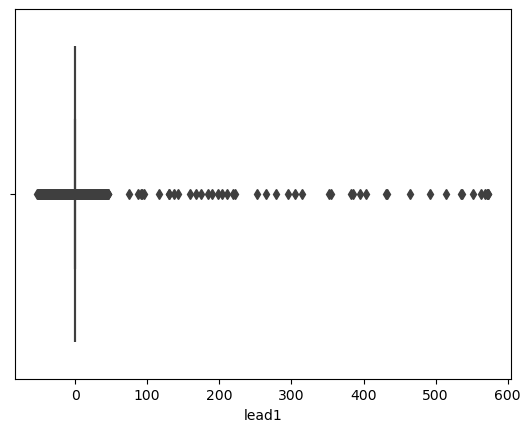

In [13]:

sns.boxplot(x = df["lead1"])


#### Generate the lead2 feature bloxplot.

<Axes: xlabel='lead2'>

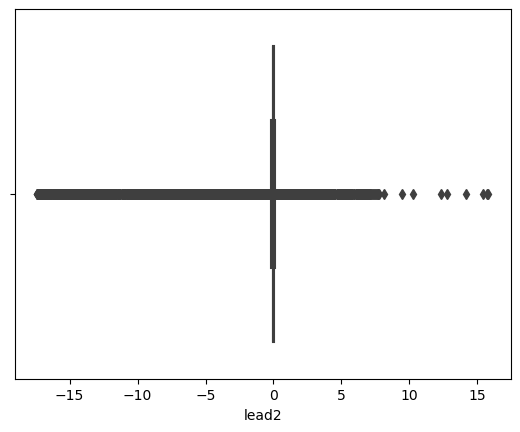

In [14]:

sns.boxplot(x = df["lead2"])


#### Generate the lead3 feature bloxplot.

<Axes: xlabel='lead3'>

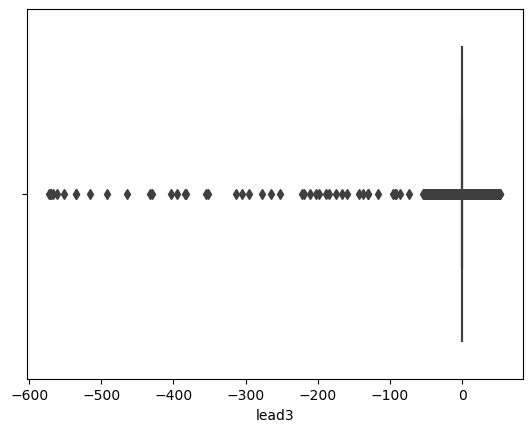

In [15]:

sns.boxplot(x = df["lead3"])


#### Generate the aVR feature bloxplot.

<Axes: xlabel='aVR'>

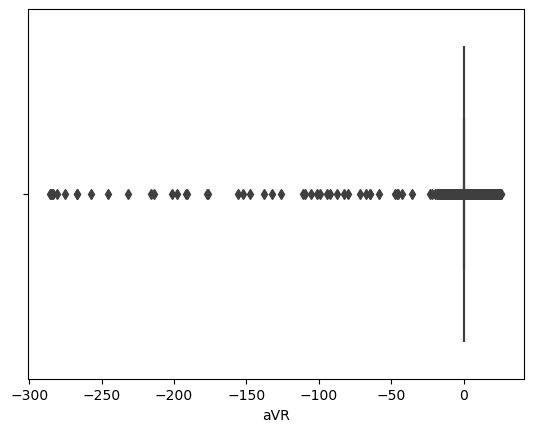

In [16]:

sns.boxplot(x = df["aVR"])


#### Generate the aVL feature bloxplot.

<Axes: xlabel='aVL'>

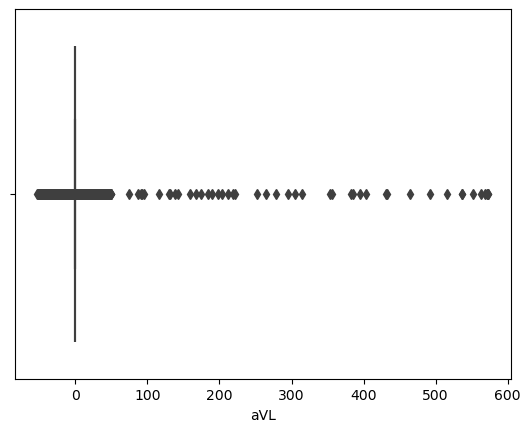

In [7]:

sns.boxplot(x = df["aVL"])


#### Generate the aVF feature bloxplot.

<Axes: xlabel='aVF'>

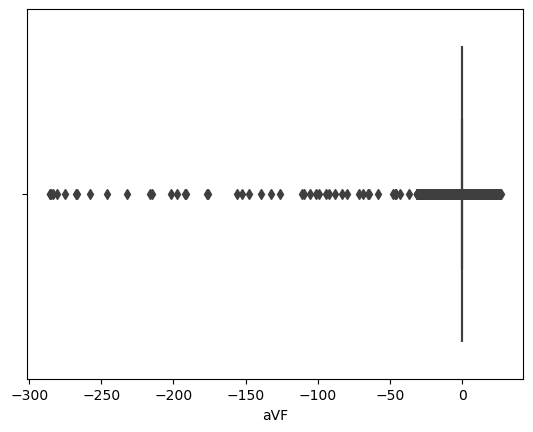

In [8]:

sns.boxplot(x = df["aVF"])


#### Generate the V1 feature bloxplot.

<Axes: xlabel='V1'>

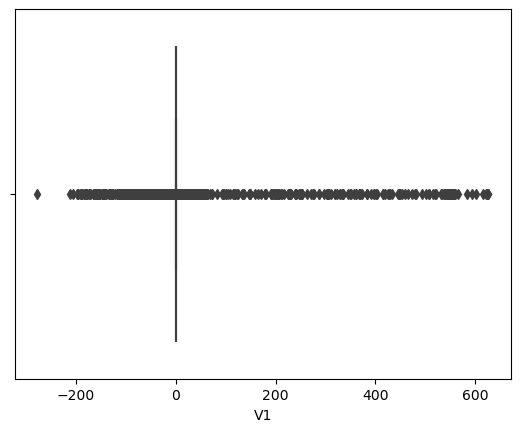

In [9]:

sns.boxplot(x = df["V1"])


#### Generate the V2 feature bloxplot.

<Axes: xlabel='V2'>

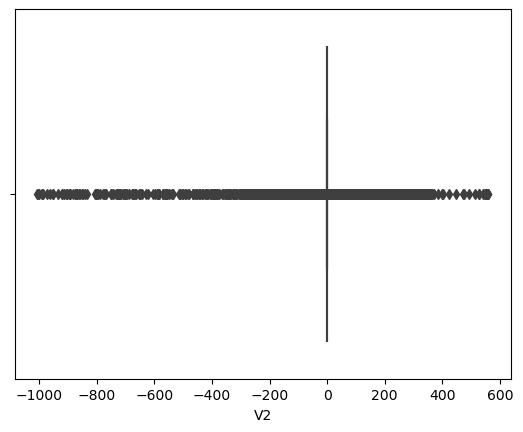

In [10]:

sns.boxplot(x = df["V2"])


#### Generate the V3 feature bloxplot.

<Axes: xlabel='V3'>

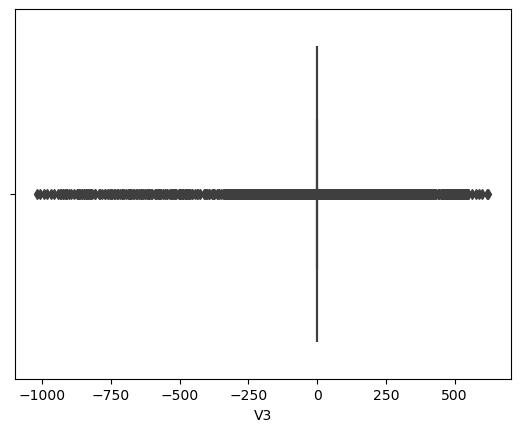

In [11]:

sns.boxplot(x = df["V3"])


#### Generate the V4 feature bloxplot.

<Axes: xlabel='V4'>

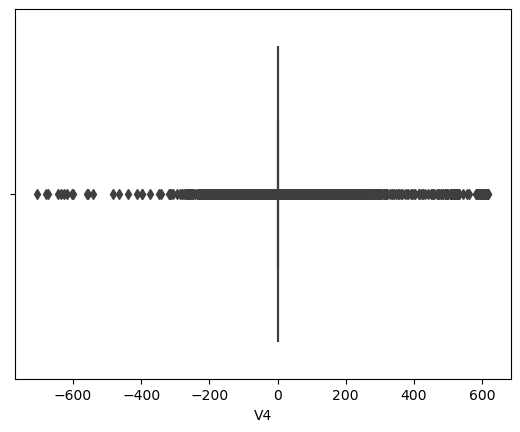

In [12]:

sns.boxplot(x = df["V4"])


#### Generate the V5 feature bloxplot.

<Axes: xlabel='V5'>

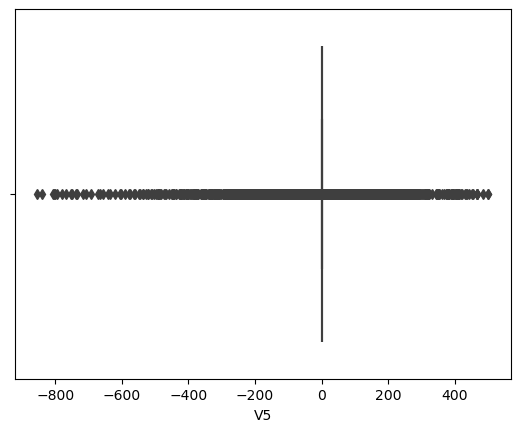

In [13]:

sns.boxplot(x = df["V5"])


#### Generate the V6 feature bloxplot.

<Axes: xlabel='V6'>

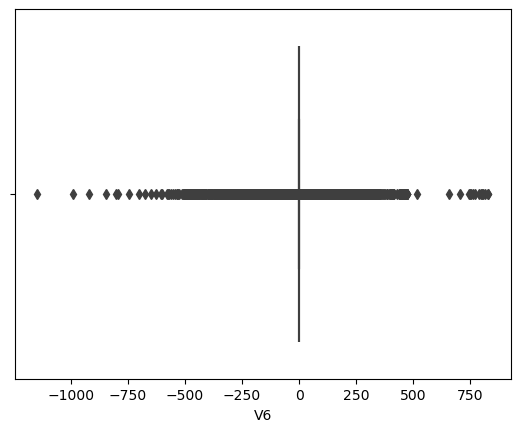

In [14]:

sns.boxplot(x = df["V6"])


#### Check the balance of the dataset.

In [16]:

class_counts = df["arrhythmia_code"].value_counts()
total_instances = class_counts.sum().compute()
class_percentages = (class_counts / total_instances * 100).round(2)
class_info = dd.concat([class_counts, class_percentages], axis = 1)
class_info.columns = ["Frequence", "Percentage"]
class_info_sorted = class_info.compute().sort_values(by = "Frequence", ascending = False)
print(class_info_sorted)


                 Frequence  Percentage
arrhythmia_code                       
1                 69525000      53.960
22                13295000      10.320
147                6670000       5.180
23                 5615000       4.360
145                5225000       4.060
105                4585000       3.560
60                 3930000       3.050
21                 3615000       2.810
50                 3315000       2.570
146                2700000       2.100
106                2365000       1.840
30                 1920000       1.490
125                1005000       0.780
120                 610000       0.470
121                 555000       0.430
82                  490000       0.380
142                 480000       0.370
51                  470000       0.360
161                 385000       0.300
101                 385000       0.300
165                 320000       0.250
104                 310000       0.240
36                  220000       0.170
160                 17500

#### Conclusions:
- There is no missing or inconsistent data.
- Features have values on different scales. This is an indication that it may be necessary to normalize or resize the values.
- The skewness analysis shows that all features have an asymmetric distribution. This is an indication that it may be necessary to use dataset balancing techniques.
- The kurtosis analysis and the generated boxplots show that all features have outliers. This is an indication that it may be necessary to eliminate outliers from the dataset, if possible in this context, or use a Machine Learning model that can better deal with outliers if they were kept in the dataset.
- The analysis of the correlation between the features shows that the features aVF, aVL, and aVR have a strong correlation (above 90%) with the features lead1 and lead3. This is an indication that the option of removing these 3 features from the dataset should be considered.
- The dataset is quite unbalanced. There are classes that have less than 1% of instances. This is an indication that the use of balancing techniques or an alternative for regrouping instances into classes of greater granularity should be considered.
